In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns[0]

'Unnamed: 0'

In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


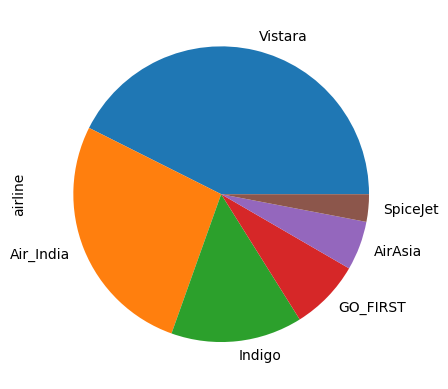

In [7]:
df['airline'].value_counts().plot(kind='pie')
plt.show()

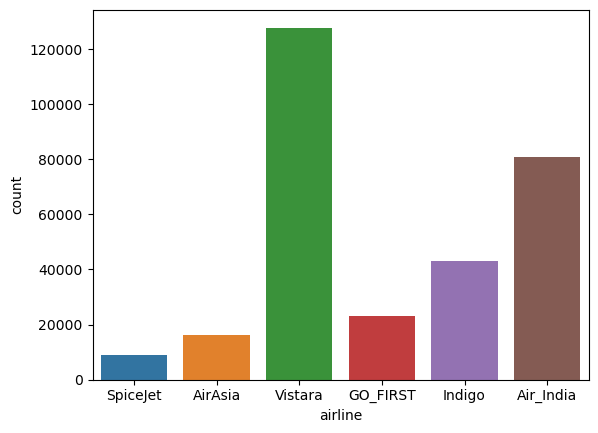

In [8]:
# count of each airlines

sns.countplot(data=df, x='airline')
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

Vistara has the highest number of flights and 2nd highest is Air india

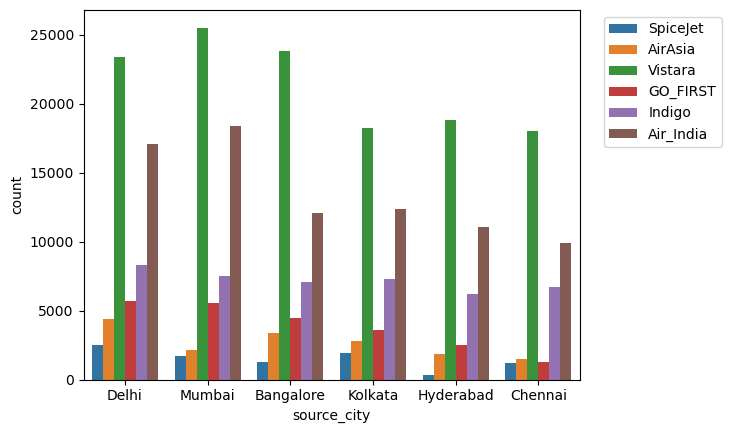

In [9]:
# number of airlines to source city
sns.countplot(data=df, x='source_city', hue='airline')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

Airline 'vistara' seems to have highest number of flights going to each city and then Air india. we can see most of the flights are going to delhi, mumbai and bangalore

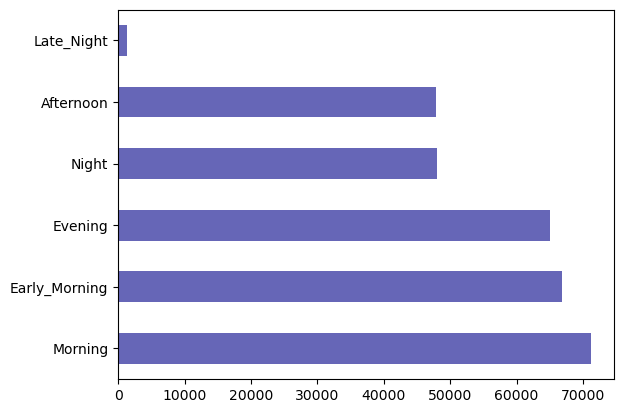

In [10]:
df['departure_time'].value_counts().plot(kind='barh', color='#0089')
plt.show()

Most of the flights are departed in the morning, early morning and evening.

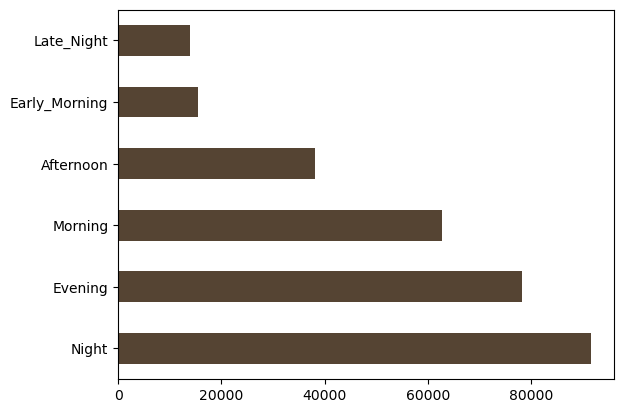

In [11]:
df['arrival_time'].value_counts().plot(kind='barh', color='#543')
plt.show()

most of the flights are arriving in the night or evening or morning

In [12]:
df.groupby(['source_city', 'destination_city'])['price'].sum().reset_index()

,source_city,destination_city,price
0,Bangalore,Chennai,149493059
1,Bangalore,Delhi,243801907
2,Bangalore,Hyderabad,189506810
3,Bangalore,Kolkata,235658614
4,Bangalore,Mumbai,299261197
5,Chennai,Bangalore,162856455
6,Chennai,Delhi,185699575
7,Chennai,Hyderabad,131771981
8,Chennai,Kolkata,158304138
9,Chennai,Mumbai,212587504


In [13]:
df.groupby(['class', 'stops', 'departure_time'])['price'].sum().reset_index()

,class,stops,departure_time,price
0,Business,one,Afternoon,591642776
1,Business,one,Early_Morning,979206862
2,Business,one,Evening,1021685383
3,Business,one,Late_Night,6101132
4,Business,one,Morning,1133463612
5,Business,one,Night,878155504
6,Business,two_or_more,Afternoon,20030709
7,Business,two_or_more,Early_Morning,28292973
8,Business,two_or_more,Evening,17024749
9,Business,two_or_more,Morning,9892426


flights that departs in the morning and evening are costly. night and late night flights are cheaper for both business or economy class

In [14]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [15]:
df.groupby('days_left')['price'].mean().reset_index()

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


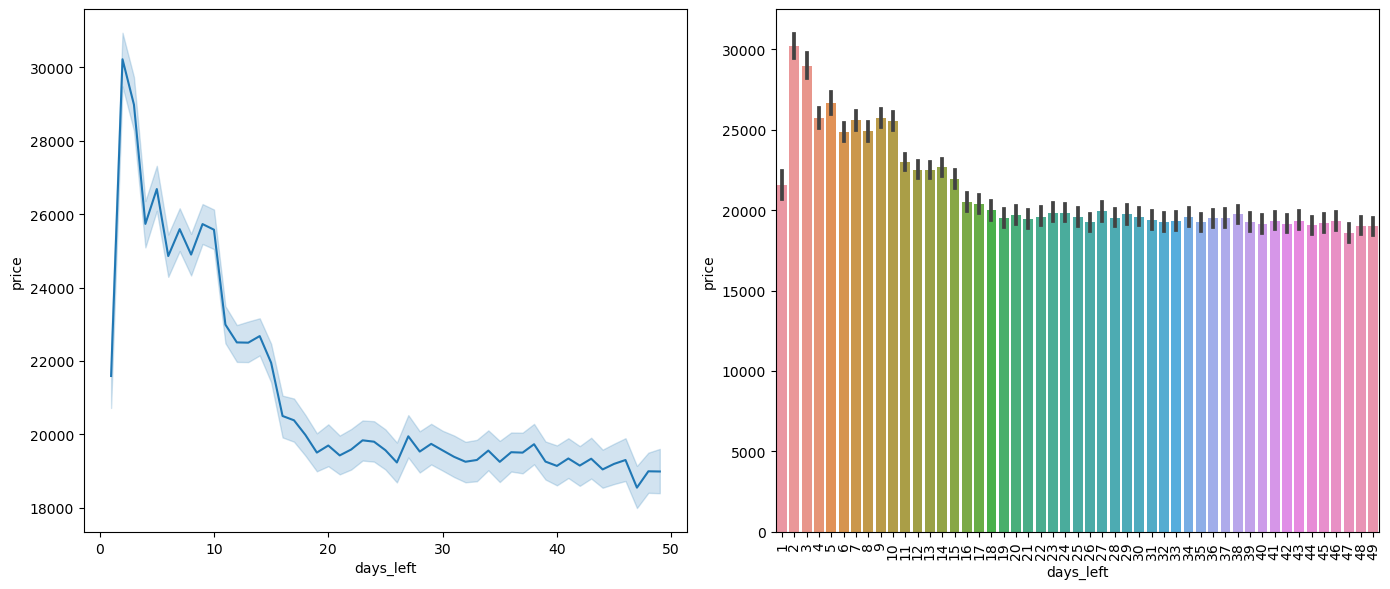

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.tight_layout()
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0])
sns.barplot(x='days_left', y='price', data=df, ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


the above graph indicates that as the days_left increase, the price decreased. it has been high for first 15 days and airlines have reduced the price to attract more passengers.

In [17]:
def discount_on_price(p):
    
    if p['days_left'] == 1:
        
        return '5% discount'
    
    elif p['days_left'] >=2 & p['days_left'] <=7:
        
        return '10% discount'
    
    elif p['days_left'] >7 and p['days_left'] <=15:
        
            return '20% discount'
        
    else:
        
        return 'No discount'
    
    
df['discount'] = df.apply(func=discount_on_price, axis=1)
        

<AxesSubplot:>

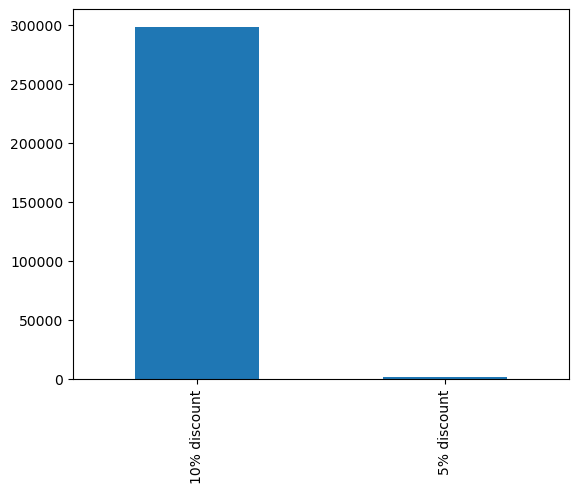

In [18]:
df['discount'].value_counts().plot(kind='bar')

In [19]:
du = df.duplicated()

In [20]:
du.sum()

0

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
df['airline'] = encoder.fit_transform(df['airline'])
df['source_city'] = encoder.fit_transform(df['source_city'])
df['stops'] = encoder.fit_transform(df['stops'])
df['destination_city'] = encoder.fit_transform(df['destination_city'])
df['class'] = encoder.fit_transform(df['class'])
df['arrival_time'] = encoder.fit_transform(df['arrival_time'])
df['departure_time'] = encoder.fit_transform(df['departure_time'])

In [24]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,discount
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953,5% discount
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953,5% discount
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956,5% discount
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955,5% discount
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955,5% discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,UK-822,1,4,0,2,3,0,10.08,49,69265,10% discount
300149,300149,5,UK-826,1,0,0,5,3,0,10.42,49,77105,10% discount
300150,300150,5,UK-832,1,1,0,5,3,0,13.83,49,79099,10% discount
300151,300151,5,UK-828,1,1,0,2,3,0,10.00,49,81585,10% discount


In [25]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'discount'],
      dtype='object')

In [26]:
X = df.drop(labels=['Unnamed: 0', 'flight', 'price', 'discount'], axis=1).values

In [27]:
X

array([[ 4.  ,  2.  ,  2.  , ...,  1.  ,  2.17,  1.  ],
       [ 4.  ,  2.  ,  1.  , ...,  1.  ,  2.33,  1.  ],
       [ 0.  ,  2.  ,  1.  , ...,  1.  ,  2.17,  1.  ],
       ...,
       [ 5.  ,  1.  ,  1.  , ...,  0.  , 13.83, 49.  ],
       [ 5.  ,  1.  ,  1.  , ...,  0.  , 10.  , 49.  ],
       [ 5.  ,  1.  ,  4.  , ...,  0.  , 10.08, 49.  ]])

In [28]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,discount
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953,5% discount
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953,5% discount
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956,5% discount
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955,5% discount
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955,5% discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,UK-822,1,4,0,2,3,0,10.08,49,69265,10% discount
300149,300149,5,UK-826,1,0,0,5,3,0,10.42,49,77105,10% discount
300150,300150,5,UK-832,1,1,0,5,3,0,13.83,49,79099,10% discount
300151,300151,5,UK-828,1,1,0,2,3,0,10.00,49,81585,10% discount


In [29]:
y = df['price'].values

In [30]:
y

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585], dtype=int64)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [34]:
X_scaled

,0,1,2,3,4,5,6,7,8
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
300148,1.0,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0
300149,1.0,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0
300150,1.0,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0
300151,1.0,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0


In [35]:
X_scaled.describe().style.background_gradient(axis=1)

,0,1,2,3,4,5,6,7,8
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.620975,0.515518,0.483467,0.142084,0.614817,0.517661,0.688536,0.232470,0.520932
std,0.366653,0.350352,0.350855,0.332912,0.348333,0.348909,0.463093,0.146775,0.282521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.000000,0.400000,0.200000,0.000000,0.122449,0.291667
50%,0.600000,0.400000,0.400000,0.000000,0.800000,0.600000,1.000000,0.212653,0.520833
75%,1.000000,0.800000,0.800000,0.000000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=44)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
lr_model = LinearRegression()

In [40]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = lr_model.predict(X_test)

In [42]:
pred

array([ 5064.19362503,  1505.67536073, 52035.59008566, ...,
        5498.27182773,  6483.12661794,  3999.14672934])

In [43]:
train_score = lr_model.score(X_train, y_train)

In [44]:
train_score

0.9044248888752047

In [45]:
test_score = lr_model.score(X_test, y_test)

In [46]:
test_score

0.9050338509611826

In [47]:
r_score = r2_score(pred, y_test)

In [48]:
r_score

0.8952121657503023

In [49]:
mean_absolute_error(pred, y_test)

4640.9547957700115

In [50]:
mean_squared_error(pred, y_test)

48921028.62995198

In [51]:
root_mean_error = np.sqrt(mean_squared_error(pred, y_test))

In [52]:
root_mean_error

6994.35691325171

In [53]:
q = [0.8, 0.4, 0.4, 1.0, 1.0, 1.0, 1.0, 0.027347, 0.0]

In [54]:
p = lr_model.predict([q])

In [55]:
p

array([5185.86914877])

In [56]:
residual_error = pred - y_test

In [57]:
residual_error

array([ 2582.19362503, -4668.32463927, -8553.40991434, ...,
         826.27182773, -4188.87338206,  1796.14672934])

In [58]:
import scipy as sp

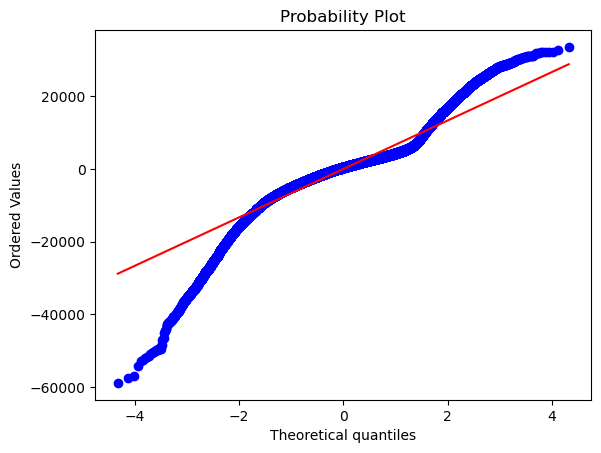

In [59]:
fig, ax = plt.subplots(dpi=100)

s = sp.stats.probplot(x=residual_error, plot=ax)